In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno    # 누락값 표시
import warnings
warnings.filterwarnings('ignore')  # dnjsld antl

%matplotlib inline    
# 새로운 창 안 뜨고 노트북에 바로 뜸

C:\Users\asdou\AppData\Local\Temp\ipykernel_7336\3106286085.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('./Titanic_data/train.csv')

# Sex: Categorical feature 




In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()
f, ax= plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby('Sex').sum().plot.bar(ax=ax[0])
sns.countplot(x='Sex', data= data, hue='Survived', ax=ax[1])

ax[0].set_title('Number of survivals: Sex')
ax[1].set_ylabel('')
ax[1].set_title('Survial vs Dead: Sex')
plt.show()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [5]:
data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

# Pclass: Ordinal Feature

In [ ]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

f, ax= plt.subplots(1,2, figsize=(18,8))
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[0])
data['Survived'].groupby(data['Pclass']).mean().plot.bar(ax=ax[1])

ax[0].set_title('Survival vs Dead: Pclass')
ax[1].set_title('Survival Rate: Pclass')
plt.show()

In [4]:
# factorplot 그리기

pd.crosstab([data['Sex'],data['Pclass']], data['Survived'], margins=True)
sns.factorplot('Pclass', 'Survived', hue= 'Sex', data = data, size=6, aspect=1.5)
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=data, saturation=0.5, size=9, aspect=1)

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
# 도화지 그리는 방법

f, ax =  plt.subplots(1,1, figsize(10,10))

plt.figure(figsize(10,10))

# Age: Continuous Feature

In [6]:
# Age null value
data.isnull().sum()  # 177개 null

# Name 데이터의 Initial 값 추출해서 age band 만들기
data['Initial']=0
for i in data:
  data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.')  # 정규식
pd.crosstab(data['Initial'], data.Sex).T.style.background_gradient(cmap='cool_r')
data.Initial.replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don']
                     ,['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr' ], inplace= True)
data.Age.groupby(data.Initial).mean()

#Age null value 채우기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

data.Age.isnull().any()

False

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
f, ax= plt.subplots(1,2, figsize=(40,10))

sns.distplot(data[data['Survived']==0].Age, bins=20, ax=ax[0])
ax[0].set_title('Survived = 0')
a=list(range(0,85,5))
ax[0].set_xticks(a)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_ylabel('')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(a)
ax[1].set_yticks(range(0,150,20))

plt.show

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data= data, scale= 'count', split=True, ax=ax[0])
ax[0].set_yticks(range(0, 91, 20))
sns.violinplot('Sex', 'Age', hue='Survived', data= data, scale= 'area', split=True, ax=ax[1])
ax[1].set_yticks(range(0, 91, 20))
ax[1].set_ylabel('')

# Embarked: Categorical Feature

In [ ]:
data['Embarked'].fillna('S', inplace=True) # S가 제일 많아서 S로 채움

In [ ]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True)

TypeError: countplot() got multiple values for argument 'data'

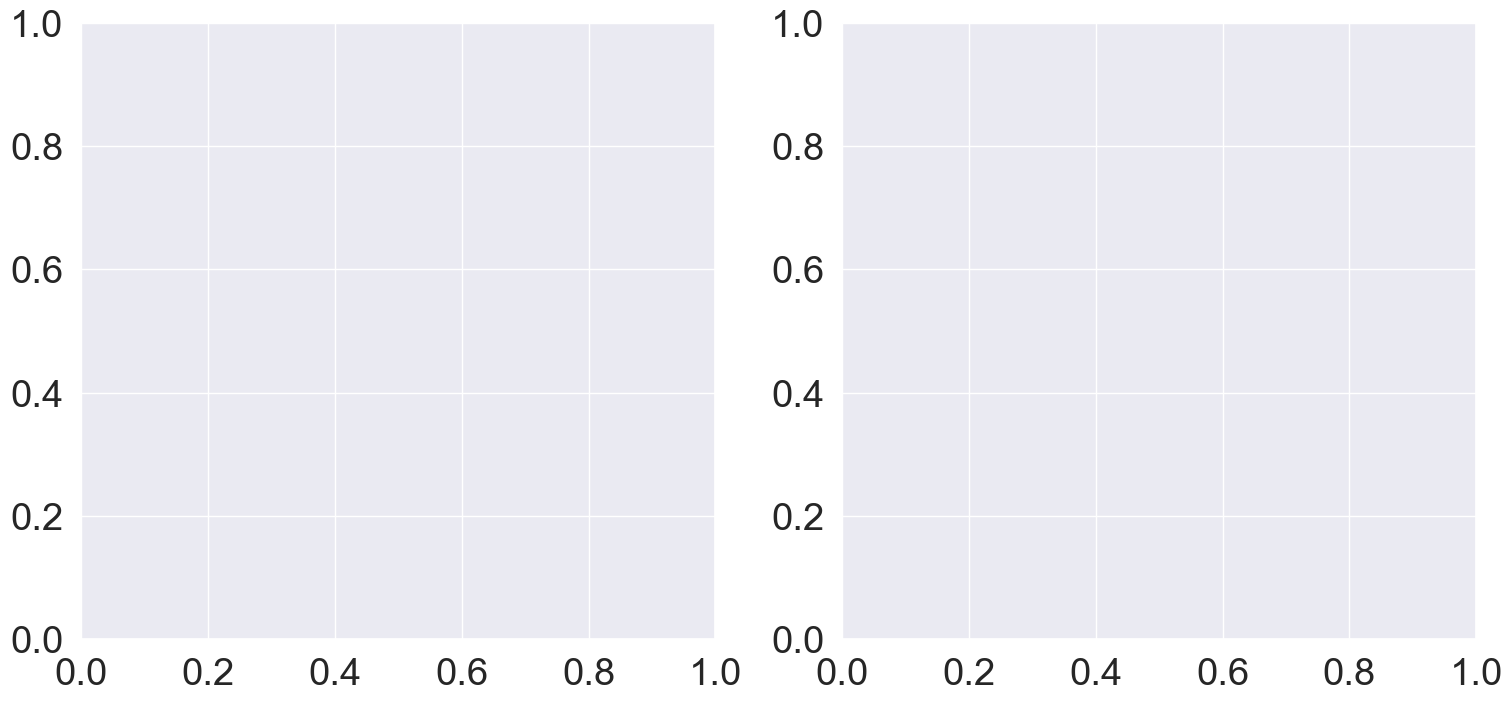

In [5]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[0])
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1])
ax[1].set_ylabel('')

sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked',data=data)

## SibSp: Discrete Feature

In [ ]:
pd.crosstab([data['Survived'], data['SibSp']],[data['Pclass'], data['Sex']], margins=True)
pd.crosstab(data.SibSp, data.Survived, margins=True)

plt.figure(figsize=(18,8))
sns.countplot('Survived', hue='SibSp', data=data)
sns.factorplot('SibSp', 'Survived',col='Pclass', hue='Sex',data=data)

# Fare: Continuous Feature

In [ ]:
f, ax=plt.subplots(1,3, figsize=(18,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[0].set_title('Pclass = 1')
ax[1].set_title('Pclass = 2')
ax[2].set_title('Pclass = 3')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

# Correlation Between The Feature

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
# 상관값을 보고 1에 지나치게 가까우면 두 변인 중 하나 제거